In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [2]:
population_data = population_data[(population_data["age"] == "overall") &
                                          (population_data["ethnicity"] == "overall") &
                                          (population_data["sex"] == "both")]
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
48,Johor,1971-01-01,both,overall,overall,1355.4
96,Johor,1972-01-01,both,overall,overall,1385.3
144,Johor,1973-01-01,both,overall,overall,1414.5
192,Johor,1974-01-01,both,overall,overall,1444.4


Plot for Johor first

In [ ]:
population_data_johor = population_data[population_data["state"] == "Johor"].copy()
population_data_johor.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
48,Johor,1971-01-01,both,overall,overall,1355.4
96,Johor,1972-01-01,both,overall,overall,1385.3
144,Johor,1973-01-01,both,overall,overall,1414.5
192,Johor,1974-01-01,both,overall,overall,1444.4


Check dimension of filtered data

In [8]:
row, column = population_data_johor.shape
print("Row:", row)
print("Column:", column)

Row: 56
Column: 6


The data is a yearly data, so extract year is enough

In [9]:
population_data_johor["year"] = pd.to_datetime(population_data_johor["date"]).dt.year
population_data_johor.head()

,state,date,sex,age,ethnicity,population,year
0,Johor,1970-01-01,both,overall,overall,1325.6,1970
48,Johor,1971-01-01,both,overall,overall,1355.4,1971
96,Johor,1972-01-01,both,overall,overall,1385.3,1972
144,Johor,1973-01-01,both,overall,overall,1414.5,1973
192,Johor,1974-01-01,both,overall,overall,1444.4,1974


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, "Population in '000s"),
 Text(0.5, 1.0, 'Population in Johor from 1970 to 2025')]

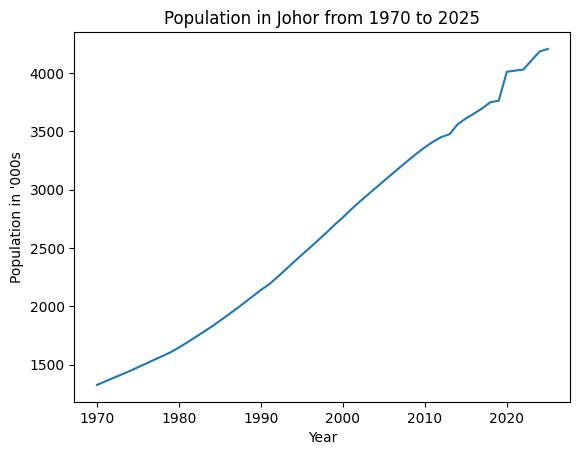

In [14]:
fig, ax = plt.subplots()
ax.plot("year", "population", data = population_data_johor)
ax.set(xlabel= "Year", ylabel= "Population in '000s", title= "Population in Johor from 1970 to 2025")

Before accepting state names variations, the name supplied as in file should work

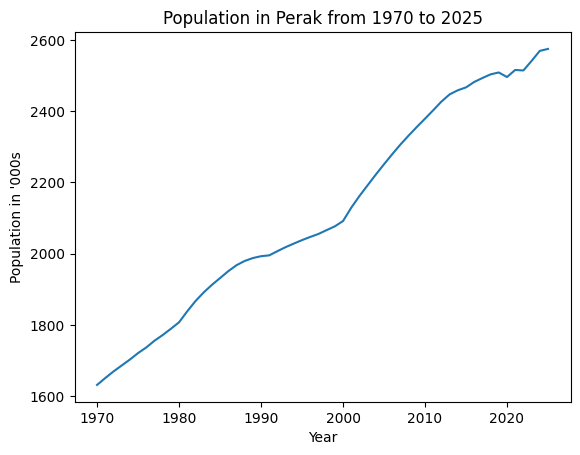

In [43]:
population_data = population_data[(population_data["age"] == "overall") &
                                          (population_data["ethnicity"] == "overall") &
                                          (population_data["sex"] == "both")]
population_data["year"] = pd.to_datetime(population_data["date"]).dt.year

def filter_population_state_year(state, start_year = None):    
    if start_year is not None:
        return population_data[(population_data["state"] == state) & (population_data["year"] >= start_year)].copy()
    else:
        return population_data[population_data["state"] == state].copy()


def plot_overall_population(state, start_year = None):
    fig, ax = plt.subplots()
    ax.plot("year", "population", data = filter_population_state_year(state, start_year))

    if start_year is not None and start_year >= 1970:
            ax.set(xlabel= "Year", ylabel= "Population in '000s", title= f"Population in {state} from {start_year} to 2025")
    else:
        ax.set(xlabel= "Year", ylabel= "Population in '000s", title= f"Population in {state} from 1970 to 2025")

plot_overall_population("Perak", 1960)